PART 1: Clustoring Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import cluster
from google.colab import auth
from google.colab import files
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)
# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

auth.authenticate_user()
uploaded = files.upload()      # added file upload feature; this will ask to upload the dataset
data = pd.read_csv('imdb_dataset.csv', header='infer')
data.dropna(axis = 1, how = 'all') 
#excludes all string values
data = data.select_dtypes(exclude = ['object'])
data.isnull().any().any()
#partition data
data = data[np.all(np.isfinite(data), axis=1)]


data



Saving imdb_dataset.csv to imdb_dataset.csv


,Unnamed: 0,runtime,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_score,audience_score
0,1,80.0,2013,4,19,2013.0,7.0,30.0,5.5,899,45,73
1,2,101.0,2001,3,14,2001.0,8.0,28.0,7.3,12285,96,81
2,3,84.0,1996,8,21,2001.0,8.0,21.0,7.6,22381,91,91
3,4,139.0,1993,10,1,2001.0,11.0,6.0,7.2,35096,80,76
4,5,90.0,2004,9,10,2005.0,4.0,19.0,5.1,2386,33,27
...,...,...,...,...,...,...,...,...,...,...,...,...
646,647,97.0,2008,7,11,2008.0,10.0,28.0,5.9,8345,44,26
647,648,82.0,1998,1,16,1998.0,6.0,30.0,6.7,46794,29,81
648,649,87.0,2008,3,9,2008.0,10.0,14.0,5.9,10087,80,52
649,650,120.0,2004,6,16,2004.0,11.0,2.0,5.8,66054,31,34


In [2]:
k_means = cluster.KMeans(n_clusters=15, max_iter=50, random_state=1)
k_means.fit(data) 
labels = k_means.labels_
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)
 

,Unnamed: 0,runtime,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_score,audience_score
0,334.638298,108.000000,2000.170213,6.957447,17.361702,2004.382979,6.382979,16.361702,6.368085,74283.276596,52.446809,61.212766
1,324.000000,122.666667,1995.333333,6.000000,17.666667,2000.333333,5.666667,11.666667,8.200000,468376.333333,90.333333,92.000000
2,317.870130,102.909091,1995.435065,6.295455,13.402597,2004.097403,6.211039,14.607143,6.318182,5573.727273,56.386364,59.396104
3,281.769231,111.384615,1998.461538,5.846154,14.923077,2003.230769,7.923077,16.923077,6.992308,193027.615385,64.846154,72.461538
4,406.200000,154.200000,1996.600000,9.200000,16.200000,2006.200000,6.600000,11.800000,8.380000,772797.800000,85.200000,88.400000
5,315.432836,106.432836,2001.313433,6.925373,13.761194,2004.820896,6.313433,16.164179,6.376119,48509.746269,50.298507,59.716418
6,346.800000,125.600000,2005.866667,7.066667,13.933333,2007.333333,7.533333,12.933333,7.413333,298406.066667,75.333333,78.200000
7,345.478261,111.173913,2000.782609,6.217391,13.695652,2003.739130,6.956522,14.913043,7.034783,147151.260870,66.434783,72.826087
8,633.000000,142.000000,2012.000000,3.000000,23.000000,2012.000000,8.000000,18.000000,7.300000,675907.000000,84.000000,81.000000
9,366.666667,116.000000,2004.333333,9.666667,10.333333,2005.333333,9.333333,10.000000,8.066667,572154.333333,89.666667,88.000000


Text(0, 0.5, 'SSE')

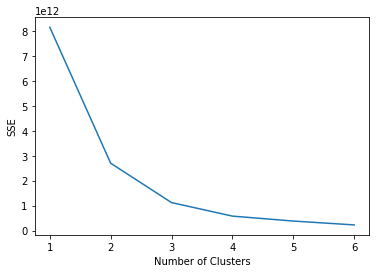

In [3]:
%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [4]:
#Hierarchial Clustering
from scipy.cluster import hierarchy
import matplotlib.cm as cm
%matplotlib inline
df = pd.read_csv('imdb_dataset.csv', header='infer')
df.head()

encode_text_index(df,'genre')
encode_text_index(df,'critics_rating')
df = df.select_dtypes(exclude = ['object'])
df.isnull().any().any()
#partition data
df = df[np.all(np.isfinite(df), axis=1)]
names = list(df['genre'].sort_index())

Y = df['critics_rating']
X = df.drop(['genre','critics_rating'], axis =1)

Z = hierarchy.linkage(X.values, 'single')

fig = plt.figure(figsize=(200, 200))

dn = hierarchy.dendrogram(Z,labels=names,orientation='right')

plt.show()
df.head()

,Unnamed: 0,genre,runtime,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_score
0,1,5,80.0,2013,4,19,2013.0,7.0,30.0,5.5,899,2,45,73
1,2,5,101.0,2001,3,14,2001.0,8.0,28.0,7.3,12285,0,96,81
2,3,3,84.0,1996,8,21,2001.0,8.0,21.0,7.6,22381,0,91,91
3,4,5,139.0,1993,10,1,2001.0,11.0,6.0,7.2,35096,0,80,76
4,5,6,90.0,2004,9,10,2005.0,4.0,19.0,5.1,2386,2,33,27


In [5]:


Z = hierarchy.linkage(X.values, 'complete')
fig = plt.figure(figsize=(200, 200))
dn = hierarchy.dendrogram(Z,labels=names,orientation='right')
plt.show()

In [ ]:
Z = hierarchy.linkage(X.values, 'average')
fig = plt.figure(figsize=(200, 200))
dn = hierarchy.dendrogram(Z,labels=names,orientation='right')
plt.show()

PART 2

In [ ]:
corpus = ['This is the first document.',
           'this is the second second document.',
           'And the third one.',
           'Is this the first first first document?',
          ]

In [6]:
import sklearn.feature_extraction.text as sk_text
import numpy as np
vectorizer = sk_text.CountVectorizer(min_df=1)

matrix = vectorizer.fit_transform(data) #data is imdb dataset

print('Data as Count Vector:\n')
print(type(matrix))          # Compressed Sparse Row matrix
print(matrix.toarray())        #  convert it to numpy array


print(vectorizer.get_feature_names())

Data as Count Vector:

<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]]
['audience_score', 'critics_score', 'dvd_rel_day', 'dvd_rel_month', 'dvd_rel_year', 'imdb_num_votes', 'imdb_rating', 'runtime', 'thtr_rel_day', 'thtr_rel_month', 'thtr_rel_year', 'unnamed']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [7]:
# start of TfdfVectorizer
vectorizer = sk_text.TfidfVectorizer( min_df= 1)

matrix = vectorizer.fit_transform(data)

print(type(matrix))
print(matrix.toarray())

print(vectorizer.get_feature_names())

<class 'scipy.sparse.csr.csr_matrix'>
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
['audience_score', 'critics_score', 'dvd_rel_day', 'dvd_rel_month', 'dvd_rel_year', 'imdb_num_votes', 'imdb_rating', 'runtime', 'thtr_rel_day', 'thtr_rel_month', 'thtr_rel_year', 'unnamed']


In [8]:
#Testing out a function from a different tutorial
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

data=pd.read_csv('imdb_dataset.csv', header='infer')

df_x = data["title"]
df_y = data["genre"]
cv=CountVectorizer() 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 4)

In [ ]:
x_traincv = cv.fit_transform(["Hi how are you, how are you doing?", "Hey waht's up", "How are you doing?"])


In [ ]:
x_traincv.toarray()

array([[2, 1, 0, 1, 2, 0, 0, 2],
       [0, 0, 1, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 1, 0, 0, 1]])

In [ ]:
cv.get_feature_names()

['are', 'doing', 'hey', 'hi', 'how', 'up', 'waht', 'you']

In [ ]:
cv1 = CountVectorizer()

In [ ]:
x_traincv = cv1.fit_transform(x_train)

In [ ]:
a = x_traincv.toarray()

In [ ]:
#The purpose of having text mining is give the data set a meaning or a trend. If there are more frequent words being used, text mining algorithm will pick up those words.

In [ ]:
# Part 3 ANN
from keras import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [ ]:
# def encode_text_dummy(df, name):
#     dummies = pd.get_dummies(df[name])
#     for x in dummies.columns:
#         dummy_name = "{}-{}".format(name, x)
#         df[dummy_name] = dummies[x]
#     df.drop(name, axis=1, inplace=True)

# def encode_text_index(df,name):
#     le = preprocessing.LabelEncoder()
#     df[name] = le.fit_transform(df[name])
#     return le.classes_

# import collections
# def to_xy(df, target):
#     result = []
#     for x in df.columns:
#         if x!= target:
#             result.append(x)

#     target_type = df[target].select_dtypes
#     target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
#     if target_type in (np.int64, np.int32):
#           dummies = pd.getdummies(df[target])
#           return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
#     else:
#         return df[result].values.astype(np.float32), df[target].values.astype(np.float32)



##made some minor changes, should work now
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

def encode_text_index(df,name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x!= target:
            result.append(x)

    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    if target_type in (np.int64, np.int32):
          dummies = pd.get_dummies(df[target])
          return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [ ]:
from google.colab import files
uploaded = files.upload()

data_df = pd.read_csv('Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv', header = 'infer')

data_df

Saving Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv to Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
#Changing Values to binary besides SOP so it'd work with encode_text_index. Can potentially double Replace
# -SOP to make it actually Binary values. 
Binarization = {"SOP": {5.0: "Amazing", 4.5: "Very Good", 4.0: "Good", 3.5: "Above Avg.", 3.0: "Below Avg.", 2.5: "Below Avg.", 2.0: "Below Avg.", 1.5: "Below Avg.", 1.0: "Below Avg.", 0.5: "Below Avg.",  0: "Below Avg."},
                "LOR ": {5.0: 1, 4.5: 1, 4.0: 1, 3.5: 1, 3.0: 0, 2.5: 0, 2.0: 0, 1.5: 0, 1.0: 0, 0.5: 0,  0: 0},
                "University Rating": {5: 1, 4: 1, 3:1, 2:0, 1:0}}


In [ ]:
data_df = data_df.replace(Binarization)
data_df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,1,Very Good,1.0,9.65,1,0.92
1,2,324,107,1,Good,1.0,8.87,1,0.76
2,3,316,104,1,Below Avg.,1.0,8.00,1,0.72
3,4,322,110,1,Above Avg.,0.0,8.67,1,0.80
4,5,314,103,0,Below Avg.,0.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,1,Very Good,1.0,9.02,1,0.87
496,497,337,117,1,Amazing,1.0,9.87,1,0.96
497,498,330,120,1,Very Good,1.0,9.56,1,0.93
498,499,312,103,1,Good,1.0,8.43,0,0.73


In [ ]:
data_df = data_df.drop(['Serial No.', 'TOEFL Score', 'CGPA', 'Chance of Admit ', 'GRE Score'], axis = 1)
data_df = data_df.replace(['Amazing', 'Very Good', 'Good', 'Above Avg.'], 'Above Average')
Classes = encode_text_index(data_df, 'SOP')
data_df

,University Rating,SOP,LOR,Research
0,1,0,1.0,1
1,1,0,1.0,1
2,1,1,1.0,1
3,1,0,0.0,1
4,0,1,0.0,0
...,...,...,...,...
495,1,0,1.0,1
496,1,0,1.0,1
497,1,0,1.0,1
498,1,0,1.0,0


In [ ]:
#If it is having errors with columns you need to adjust to the amount of columns dropped from above
testData = [[1, 'Below Avg.',1.0, 1],
            [0, 'Above Average',0.0, 1],
            [1, 'Below Avg.',0.0, 1],
            [0, 'Above Average',1.0, 1]]
testData = pd.DataFrame(testData, columns=data_df.columns)
testData

,University Rating,SOP,LOR,Research
0,1,Below Avg.,1.0,1
1,0,Above Average,0.0,1
2,1,Below Avg.,0.0,1
3,0,Above Average,1.0,1


In [ ]:
encode_text_index(testData, 'SOP')

array(['Above Average', 'Below Avg.'], dtype=object)

In [ ]:
testData

,University Rating,SOP,LOR,Research
0,1,1,1.0,1
1,0,0,0.0,1
2,1,1,0.0,1
3,0,0,1.0,1


In [ ]:
Classes

array(['Above Average', 'Below Avg.'], dtype=object)

In [ ]:
#I have no idea why this isn't working... If someone can fix it that'd make the rest of this run
#Everything passed this is pretty much following Tutorial 6. 

##Gursevak:Fixed a small bug in to_xy function, its working now
X,Y = to_xy(data_df,'SOP')
testX, testY = to_xy(testData,'SOP')

<ipython-input-21-196b72a12d6b>:51: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type


In [ ]:
print(X.shape)
print(Y.shape)
Y

(500, 3)
(500, 2)


array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim = X.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam')

In [ ]:
pred = model.predict(testX)
print(pred[1])

1/1 [==============================] - 0s 378ms/step
[0.5548609 0.4451391]


In [ ]:
pred = np.argmax(pred, axis=1)

In [ ]:
true = np.argmax(testY, axis=1)

In [ ]:
Classes[pred]

array(['Below Avg.', 'Above Average', 'Below Avg.', 'Below Avg.'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report


In [ ]:
print('Accuracy on test data is %.2f' % (accuracy_score(true, pred)))

Accuracy on test data is 0.75


In [ ]:
print(classification_report(true,pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

